In [ ]:
import pandas as pd

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasmovdyant","key":"4d4759066dca189587bcac8981b34740"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0


In [ ]:
!unzip /content/twitter-entity-sentiment-analysis.zip

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: twitter_training.csv    
  inflating: twitter_validation.csv  


In [ ]:
df = pd.read_csv('/content/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
val_df = pd.read_csv("/content/twitter_validation.csv", encoding='latin1')
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tomâs great auntie as âHayley canât get out of bedâ and told to his grandma, who now thinks Iâm a lazy, terrible person ð¤£"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [ ]:
val_df.columns = ['tweet_id', 'entity', 'label', 'text']
val_df.head()

,tweet_id,entity,label,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [ ]:
df.columns = ['tweet_id', 'entity', 'label', 'text']
df.head()

,tweet_id,entity,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
import re

def clean_text(text):
    text = str(text)
    text = text.lower()  # kiçik hərflərə çevir
    # text = re.sub(r'@[\w]*', '', text)  # @user adlarını sil
    text = re.sub(r'http\S+', '', text)  # linkləri sil
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hərf olmayanları sil (emoji, !, ?, . və s.)
    text = re.sub(r'\s+', ' ', text).strip()  # əlavə boşluqları sil
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head(10)

,text,clean_text
0,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...
4,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
5,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
6,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
7,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
8,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
9,2010 So I spent a few hours making something f...,so i spent a few hours making something for fu...


In [ ]:
val_df['clean_text'] = df['text'].apply(clean_text)
val_df[['text', 'clean_text']].head(10)

,text,clean_text
0,BBC News - Amazon boss Jeff Bezos rejects clai...,i am coming to the borders and i will kill you...
1,@Microsoft Why do I pay for WORD when it funct...,im getting on borderlands and i will kill you all
2,"CSGO matchmaking is so full of closet hacking,...",im coming on borderlands and i will murder you...
3,Now the President is slapping Americans in the...,im getting on borderlands and i will murder yo...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...,im getting into borderlands and i can murder y...
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,so i spent a few hours making something for fu...
6,"Rocket League, Sea of Thieves or Rainbow Six: ...",so i spent a couple of hours doing something f...
7,my ass still knee-deep in Assassins Creed Odys...,so i spent a few hours doing something for fun...
8,FIX IT JESUS ! Please FIX IT ! What In the wor...,so i spent a few hours making something for fu...
9,The professional dota 2 scene is fucking explo...,so i spent a few hours making something for fu...


In [ ]:
val_texts = val_df['clean_text'].astype(str).tolist()

In [ ]:
val_texts = val_df['clean_text'].astype(str).tolist()
val_labels = val_df['entity'].map({
    'Irrelevant': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3
}).tolist()

In [ ]:
X_val = pad_sequences(tokenizer.texts_to_sequences(val_texts), maxlen=max_len, padding='post')
y_val = val_labels

<ipython-input-50-a86c1bd49d8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


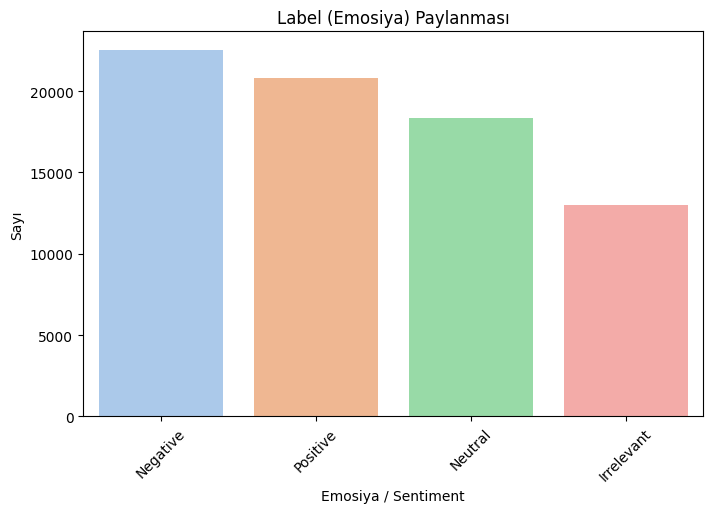

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Etiketlərin sayını say
label_counts = df['label'].value_counts()

# Qrafiklə göstər
plt.figure(figsize=(8,5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')
plt.title('Label (Emosiya) Paylanması')
plt.xlabel('Emosiya / Sentiment')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Parametrlər
vocab_size = 10000
max_len = 100

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Text to sequence
sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [ ]:
# Emosiya/sentimentləri ədədi formaya çeviririk
le = LabelEncoder()
labels = le.fit_transform(df['label'])

# Nümunə üçün: ['positive', 'negative', ...] → [0, 1, ...]
num_classes = len(le.classes_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import Input


input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len)(input_layer)
lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
attention = MultiHeadAttention(num_heads=2, key_dim=64)(lstm_1, lstm_1)
lstm_2 = Bidirectional(LSTM(64, return_sequences=False))(attention)
dropout = Dropout(0.5)(lstm_2)
dense = Dense(64, activation='relu')(dropout)
output_layer = Dense(num_classes, activation='softmax')(dense)
model = Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 100, 128)  │  1,280,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 100, 256)  │    263,168 │ embedding_4[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 100, 256)  │    131,712 │ bidirectional_7[… │
│ (MultiHeadAttentio… │                   │            │ bidirectional_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 128)       │    164,352 │ multi_head_atten… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ bidirectional_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │      8,256 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │        260 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,847,748 (7.05 MB)

 Trainable params: 1,847,748 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Etiketlər
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Nəticəni dictionary formatına salırıq
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

{0: np.float64(1.446025752735018), 1: np.float64(0.8265176249239112), 2: np.float64(1.0114444369201598), 3: np.float64(0.9010074199191651)}


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32,
    class_weight=class_weights_dict
)

Epoch 1/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.4564 - loss: 1.1839 - val_accuracy: 0.5827 - val_loss: 0.9872
Epoch 2/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.6123 - loss: 0.9418 - val_accuracy: 0.6574 - val_loss: 0.8505
Epoch 3/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.7062 - loss: 0.7775 - val_accuracy: 0.6812 - val_loss: 0.8144
Epoch 4/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.7515 - loss: 0.6767 - val_accuracy: 0.7194 - val_loss: 0.7342
Epoch 5/5
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.7927 - loss: 0.5772 - val_accuracy: 0.7544 - val_loss: 0.6669


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
              precision    recall  f1-score   support

  Irrelevant       0.71      0.70      0.70      2661
    Negative       0.81      0.82      0.81      4471
     Neutral       0.67      0.74      0.70      3551
    Positive       0.80      0.74      0.77      4254

    accuracy                           0.75     14937
   macro avg       0.75      0.75      0.75     14937
weighted avg       0.76      0.75      0.75     14937



Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.8681 - loss: 0.3690 - val_accuracy: 0.7964 - val_loss: 0.5951
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 86s 27ms/step - accuracy: 0.8845 - loss: 0.3210 - val_accuracy: 0.8066 - val_loss: 0.5782
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - accuracy: 0.8960 - loss: 0.2883 - val_accuracy: 0.8113 - val_loss: 0.5807
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9042 - loss: 0.2617 - val_accuracy: 0.8154 - val_loss: 0.5934
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9113 - loss: 0.2418 - val_accuracy: 0.8222 - val_loss: 0.5742
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9184 - loss: 0.2234 - val_accuracy: 0.8220 - val_loss: 0.5875
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9206 - loss: 0.2091 - val_accuracy: 0.8256 - val_loss: 0.5913
Epoch 8/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9255 -

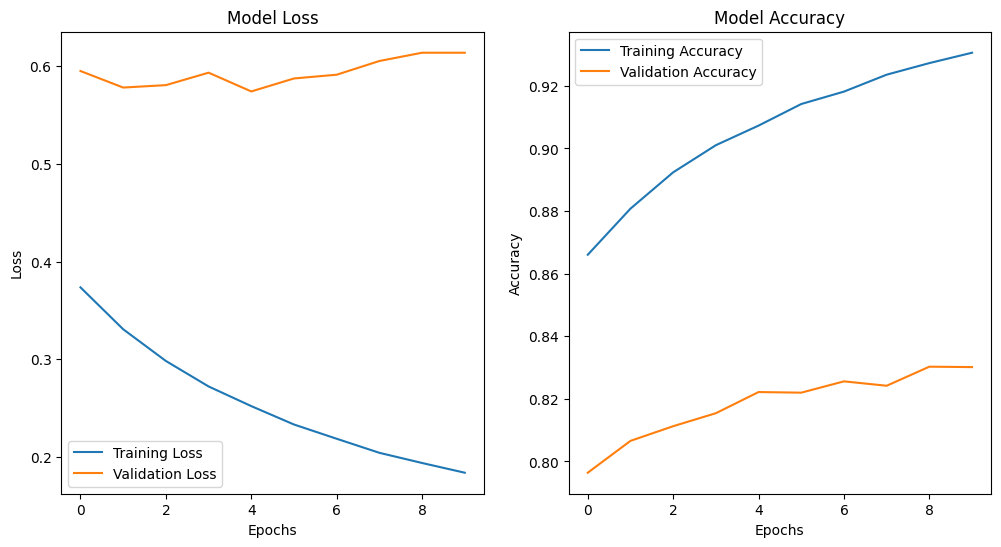

In [ ]:
import matplotlib.pyplot as plt

# Modelin təlimini başlatırıq
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Loss və Accuracy qrafiklərini çəkirik
# Loss Qrafiki
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Qrafiki
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
def predict_emotion(tweet):
    # Tweet-i əvvəlcədən işləyirik (tokenize, pad, və s.)
    tweet_sequence = tokenizer.texts_to_sequences([tweet])
    tweet_padded = pad_sequences(tweet_sequence, maxlen=max_len, padding='post')

    # Modeli istifadə edərək prediksiya edirik
    pred = model.predict(tweet_padded)

    # Emosiyaların etiketləri (labels) təyin edirik
    emotions = ['Irrelevant', 'Negative', 'Neutral', 'Positive']

    # Ən yüksək ehtimalı olan emosiyanı seçirik
    predicted_emotion = emotions[pred.argmax()]

    return predicted_emotion

# Nümunə tweet
tweet = "This is a great day!"
predicted_emotion = predict_emotion(tweet)
print(f"The predicted emotion is: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The predicted emotion is: Positive
